## Transfer Learning using resnet100


Please download the dataset from the below url

In [26]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

c:\Users\acer\anaconda3\Lib\site-packages\tensorflow\python\client\session.py:1770: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [27]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
#from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16

from tensorflow.keras.applications.resnet_v2 import ResNet101V2
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [28]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = './Dataset1/train'
valid_path = './Dataset1/test'


In [29]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

#resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

resnet=ResNet101V2(input_shape=IMAGE_SIZE + [3],include_top=False, weights='imagenet')




In [30]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [31]:
  # useful for getting number of output classes
folders = glob('./Dataset1/train/*')
folders

['./Dataset1/train\\healthycows', './Dataset1/train\\lumpycows']

In [32]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [33]:
prediction = Dense(len(folders), activation='sigmoid')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [34]:

# view the structure of the model
xx=model.summary()
xx

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_3[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 114, 114, 64)         0         ['conv1_conv[0][0]']          
                                                                                            

In [35]:
# tell the model what cost and optimization method to use
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [36]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [37]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('./Dataset1/train',
                                                 target_size = (224, 224),
                                                 batch_size = 10,
                                                 class_mode = 'categorical')

Found 936 images belonging to 2 classes.


In [38]:
test_set = test_datagen.flow_from_directory('./Dataset1/test',
                                            target_size = (224, 224),
                                            batch_size = 10,
                                            class_mode = 'categorical',shuffle=False)

Found 221 images belonging to 2 classes.


In [39]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
94/94 [==============================] - 120s 1s/step - loss: 3.0091 - accuracy: 0.7543 - val_loss: 1.7471 - val_accuracy: 0.8371
Epoch 2/10
94/94 [==============================] - 110s 1s/step - loss: 1.7166 - accuracy: 0.8686 - val_loss: 1.6787 - val_accuracy: 0.8597
Epoch 3/10
94/94 [==============================] - 112s 1s/step - loss: 1.4191 - accuracy: 0.9049 - val_loss: 0.9565 - val_accuracy: 0.9321
Epoch 4/10
94/94 [==============================] - 112s 1s/step - loss: 1.0667 - accuracy: 0.9263 - val_loss: 0.8149 - val_accuracy: 0.9412
Epoch 5/10
94/94 [==============================] - 119s 1s/step - loss: 0.8936 - accuracy: 0.9444 - val_loss: 0.9410 - val_accuracy: 0.9321
Epoch 6/10
94/94 [==============================] - 118s 1s/step - loss: 1.1850 - accuracy: 0.9444 - val_loss: 0.4592 - val_accuracy: 0.9729
Epoch 7/10
94/94 [==============================] - 120s 1s/step - loss: 0.6210 - accuracy: 0.9669 - val_loss: 0.4979 - val_accuracy: 0.9638
Epoch 8/10
94

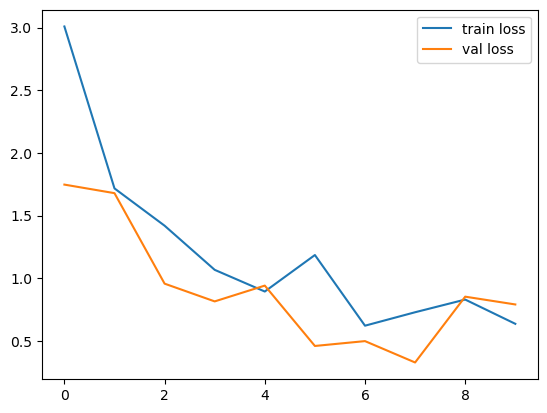

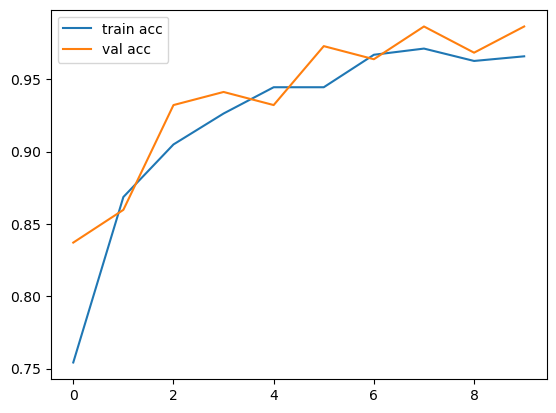

<Figure size 640x480 with 0 Axes>

In [40]:
# plot the loss

import matplotlib.pyplot as plt

plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [41]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('lumpyresnet100.h5')

c:\Users\acer\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# New Section

In [42]:

y_pred = model.predict(test_set)


23/23 [==============================] - 25s 1s/step


In [43]:
y_pred

array([[1.00000000e+00, 2.13643547e-10],
       [1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.59988794e-28],
       [1.00000000e+00, 2.03297678e-19],
       [1.00000000e+00, 3.30667336e-36],
       [1.00000000e+00, 1.67039051e-38],
       [1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 2.15161361e-19],
       [1.00000000e+00, 1.48829286e-13],
       [1.00000000e+00, 3.61931125e-05],
       [1.00000000e+00, 5.49859594e-26],
       [1.00000000e+00, 4.09927576e-19],
       [1.00000000e+00, 7.00491166e-26],
       [1.00000000e+00, 2.63381181e-25],
       [1.00000000e+00, 5.30691091e-23],
       [1.00000000e+00, 1.02136404e-19],
       [1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 9.58147913e-27],
       [1.00000000e+00, 1.52798892e-33],
       [1.00000000e+00, 6.75428125e-20],
       [1.00000000e+00, 2.16392998e-13],
       [1.00000000e+00, 0.00000000e+00],
       [1.000000

In [44]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [45]:
y_true=test_set.classes

In [46]:
from sklearn.metrics import confusion_matrix

In [47]:
cm=confusion_matrix(y_true,y_pred)
cm

array([[108,   1],
       [  2, 110]], dtype=int64)

In [48]:
from sklearn.metrics import classification_report
cr=classification_report(y_true,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       109
           1       0.99      0.98      0.99       112

    accuracy                           0.99       221
   macro avg       0.99      0.99      0.99       221
weighted avg       0.99      0.99      0.99       221



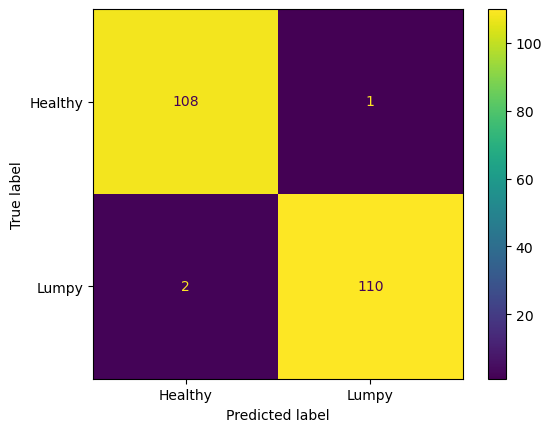

In [49]:

from sklearn import metrics
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Healthy','Lumpy'])

import matplotlib.pyplot as plt
cm_display.plot()
plt.show()